In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# from numpy.linalg import eigvals
from scipy.integrate import nquad, quad

In [25]:
# Set random seed for reproducibility
np.random.seed(42)

# Data
sampleCount = 10000
featureCount = 4
labelCount = 2

In [26]:
# Generate two multivariate Gaussian random variable objects
prior = [0.35, 0.65]

mean0, cov0 = [-1, -1, -1, -1], [[5, 3, 1, -1], [3, 5, -2, -2], [1, -2, 6, 3], [-1, -2, 3, 4]]
mean1, cov1 = [1, 1, 1, 1], [[1.6, -0.5, -1.5, -1.2], [-0.5, 8, 6, -1.7], [-1.5, 6, 6, 0], [-1.2, -1.7, 0, 1.8]]

In [27]:
# Assigning Labels
truelabel = (np.random.rand(sampleCount) >= prior[0]).astype(int)

In [28]:
# Creating the Gaussian distribution of samples

Data = np.empty((sampleCount, featureCount))

for i in range(sampleCount): 
        if (truelabel[i] == 0):
                Data[i, :] = np.random.multivariate_normal(mean0, cov0)
        elif (truelabel[i] == 1):
                Data[i, :] = np.random.multivariate_normal(mean1, cov1)

# np.save('Data.npy',Data)
# np.save('truelabel.npy',truelabel)

In [29]:
GaussPDF0 = multivariate_normal.pdf(Data ,mean = mean0, cov = cov0)
GaussPDF1 = multivariate_normal.pdf(Data ,mean = mean1, cov = cov1)
likelihoodRatio = GaussPDF1 / GaussPDF0

# print(isinstance(GaussPDF0, np.ndarray))

# print(GaussPDF0.shape)

In [30]:
gamma_val = np.linspace(0, 1, 1000)
errorRate = []
tpr_values = []
fpr_values = []

# Empirical Error calculation

for gamma in gamma_val:
    decisions = (likelihoodRatio >= gamma).astype(int)
    falsePositives = np.sum((decisions == 1) & (truelabel == 0))
    falseNegatives = np.sum((decisions == 0) & (truelabel == 1))
    truePositives = np.sum((decisions == 1) & (truelabel == 1))
    trueNegatives = np.sum((decisions == 0) & (truelabel == 0))
    totalErrors = falsePositives + falseNegatives
    errorRate.append(totalErrors / sampleCount)

    tpr = truePositives / (truePositives + falseNegatives)
    fpr = falsePositives / (falsePositives + trueNegatives)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# print(len(Data))

In [31]:
min_error_index = np.argmin(errorRate)
min_error = errorRate[min_error_index]
optimal_gamma = gamma_val[min_error_index]

fpr_min = fpr_values[min_error_index]
tpr_min = tpr_values[min_error_index]

print("Optimal gamma:", optimal_gamma)
print("Minimum total probability of error (empirical):", min_error)

Optimal gamma: 0.6546546546546547
Minimum total probability of error (empirical): 0.0197


In [32]:
def errorFn(x1, x2, x3, x4):
    x = [x1, x2, x3, x4]
    return min(multivariate_normal.pdf(x, mean=mean0, cov=cov0)*prior[0], multivariate_normal.pdf(x, mean=mean1, cov=cov1)*prior[1])

opts = {'epsabs':1.e-2}
error, _ = nquad(errorFn,ranges=[[-5,5],[-5,5],[-5,5],[-5,5]],opts=opts)
print("Error:", error)


Error: 0.0196378283728392


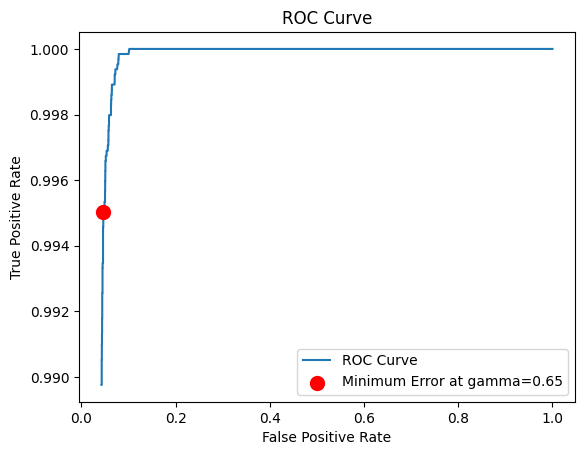

In [33]:
# Plot of ROC
plt.figure()
plt.plot(fpr_values, tpr_values, label='ROC Curve')
plt.scatter(fpr_min, tpr_min, color='red', s=100, label=f'Minimum Error at gamma={optimal_gamma:.2f}', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

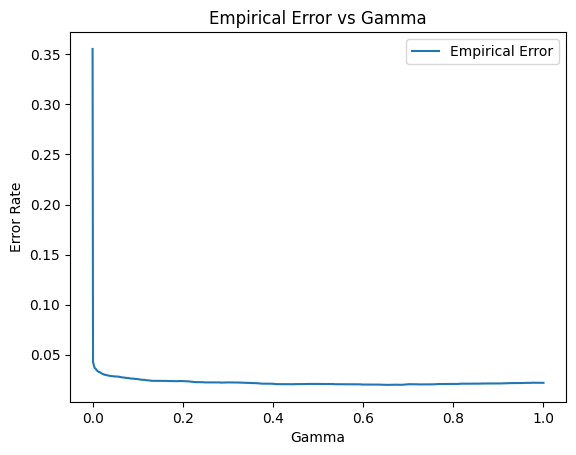

In [34]:
# Plot Empirical Error
plt.figure()
plt.plot(gamma_val, errorRate, label='Empirical Error')
plt.xlabel('Gamma')
plt.ylabel('Error Rate')
plt.title('Empirical Error vs Gamma')
plt.legend()
plt.show()

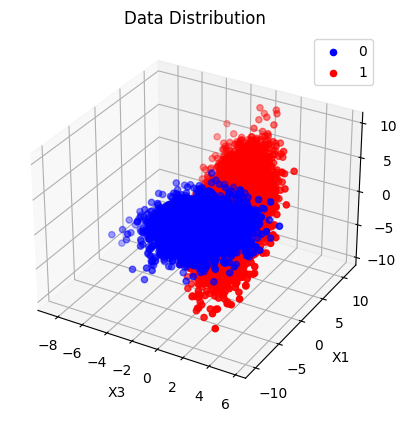

In [35]:
#Plot Data Distribution
fig = plt.figure()
ax = plt.axes(projection = "3d")
Class0 = ax.scatter(Data[(truelabel==0),3],Data[(truelabel==0),1],Data[(truelabel==0),2],'+',color ='blue', label="0")
Class1 = ax.scatter(Data[(truelabel==1),3],Data[truelabel==1,1],Data[truelabel==1,2],'.',color = 'red', label="1")
plt.xlabel('X3')
plt.ylabel('X1')
ax.set_zlabel('X2')
ax.legend()
plt.title('Data Distribution')
plt.show()